<a href="https://colab.research.google.com/github/Magui2912/Project_2_coding_dojo/blob/main/Poject2_spanish_wine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

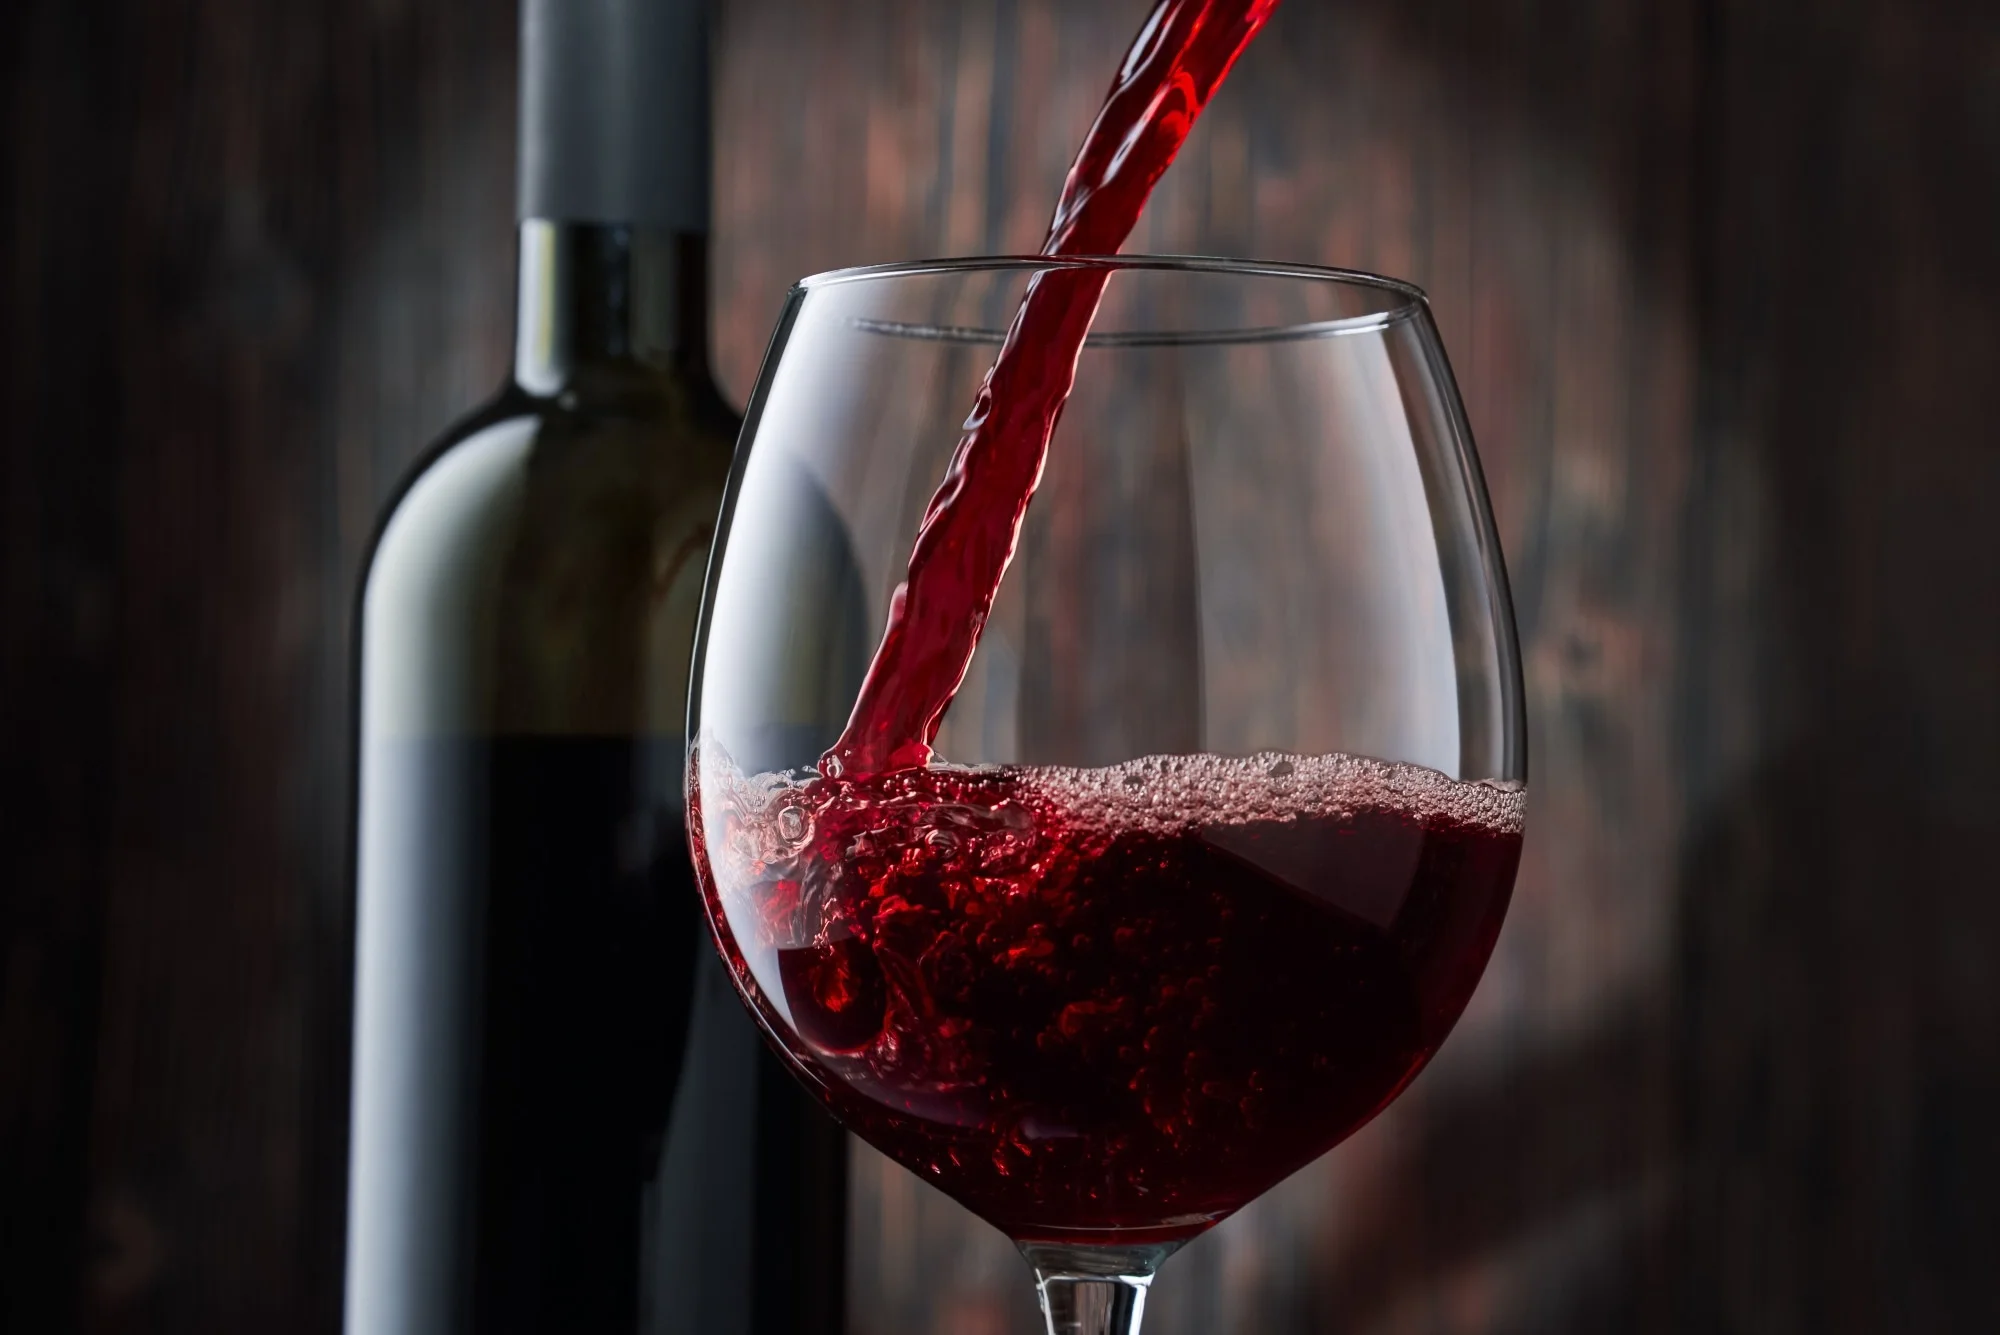

****Description :****

[The Spanish Wine Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset) is a collection of data related to red variants of Spanish wines.
The dataset contains 11 features that describe the wines, including their price, rating, and some flavor descriptions.
The dataset includes 7500 or 516 different types of red wines from Spain.
The goal of the dataset is to model wine quality based on physicochemical tests, and there is no data about grape types, wine brand, wine selling price, etc.

****Data Dictionary****

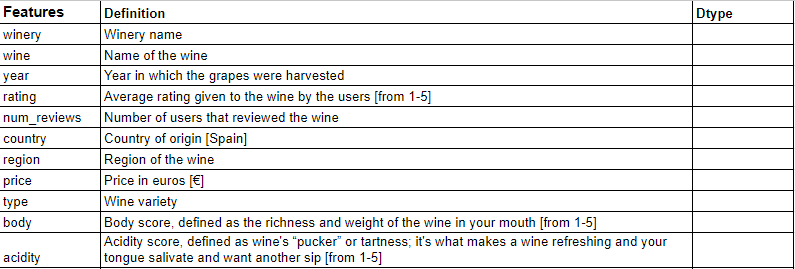

****The Target of this data set is "Price" column****

****Is a prediction Problem****

****We have 11 features ****

****We have 7500 Rows****

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
path = '/content/drive/MyDrive/wines_SPA.csv'
dfwine = pd.read_csv(path)
dfwine.info()
dfwine.sample(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
3740,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
5719,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
3002,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Red,4.0,3.0
3447,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
516,Anima Negra,Son Negre,2016,4.5,81,Espana,Mallorca,164.90,Red,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3538,Portal del Priorat,Clos del Portal Somni,2014,4.2,404,Espana,Priorato,77.36,Priorat Red,4.0,3.0
445,Ferrer Bobet,Seleccio Especial Vinyes Velles,2015,4.5,197,Espana,Priorato,64.00,Priorat Red,4.0,3.0
3567,Artadi,Valdegines,2016,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
1439,Pujanza,Rioja Norte,2010,4.3,138,Espana,Rioja,75.00,Rioja Red,4.0,3.0


In [35]:
dfwine.shape

(7500, 11)

In [36]:
print('Missing data:\n', dfwine.isnull().sum())
print('\n')
print('Duplicates:', dfwine.duplicated().sum())

Missing data:
 winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


Duplicates: 5452


In [37]:
#drop duplicates
dfwine.drop_duplicates(inplace=True)

In [38]:
dfwine = dfwine.dropna()
print('Number of Missing Values:', dfwine.isnull().sum().sum())

Number of Missing Values: 0


In [39]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 2049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1775 non-null   object 
 1   wine         1775 non-null   object 
 2   year         1775 non-null   object 
 3   rating       1775 non-null   float64
 4   num_reviews  1775 non-null   int64  
 5   country      1775 non-null   object 
 6   region       1775 non-null   object 
 7   price        1775 non-null   float64
 8   type         1775 non-null   object 
 9   body         1775 non-null   float64
 10  acidity      1775 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 166.4+ KB


In [40]:
print('unique winery', dfwine['winery'].unique())
print('unique wine', dfwine['wine'].unique())
print('\n')
print('\n')
print('unique country', dfwine['country'].unique())
print('\n')
print('unique region', dfwine['region'].unique())
print('\n')
print('unique type', dfwine['type'].unique())
print('\n')
print('unique year', dfwine['year'].unique())


unique winery ['Teso La Monja' 'Artadi' 'Vega Sicilia' 'Pago de Carraovejas'
 'Toro Albala' 'Bodegas El Nido' 'Valdespino' 'Dominio de Pingus'
 'Alvaro Palacios' 'Ordonez' 'Bodegas Valduero' 'Vina Sastre'
 'Sierra Cantabria' 'Descendientes de J. Palacios' 'La Rioja Alta'
 'Marques de Murrieta' 'Vinedos de Paganos' 'Emilio Moro'
 'Quinta de la Quietud' 'Bodegas Mauro' 'Bodega Contador (Benjamin Romeo)'
 'Remirez de Ganuza' 'Bodegas San Roman' 'Pago de Los Capellanes'
 'Bodega Numanthia' 'Alto Moncayo' 'Mas Doix' 'Bodegas Roda' 'Martinet'
 'Recaredo' 'Clos Erasmus' 'Barbadillo' 'Gonzalez-Byass' 'Bodegas Amaren'
 'Alvear' 'Equipo Navazos' 'Morca' 'Territorio Luthier' 'Terra Remota'
 'Dehesa de Los Canonigos' 'Miguel Merino' 'Alion' 'Aalto'
 'Carmelo Rodero' 'Dominio del Bendito' "Mas d'en Gil" 'Casa Castillo'
 'Matarromera' 'Nin-Ortiz' 'Vinas del Vero' 'Marques de Riscal' 'Arzuaga'
 'Bodegas Mas Alta' 'Dominio de Calogia' 'Tomas Postigo' 'Cal Pla'
 'Ossian' 'Cepa 21' 'Bodegas Vilano' 'All

In [41]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 2049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1775 non-null   object 
 1   wine         1775 non-null   object 
 2   year         1775 non-null   object 
 3   rating       1775 non-null   float64
 4   num_reviews  1775 non-null   int64  
 5   country      1775 non-null   object 
 6   region       1775 non-null   object 
 7   price        1775 non-null   float64
 8   type         1775 non-null   object 
 9   body         1775 non-null   float64
 10  acidity      1775 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 166.4+ KB


In [42]:
dfwine['year'] = dfwine['year'].replace('N.V.', np.NaN)
dfwine = dfwine.dropna()
dfwine['year'] = dfwine['year'].astype(np.int64)

In [43]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1714 non-null   object 
 1   wine         1714 non-null   object 
 2   year         1714 non-null   int64  
 3   rating       1714 non-null   float64
 4   num_reviews  1714 non-null   int64  
 5   country      1714 non-null   object 
 6   region       1714 non-null   object 
 7   price        1714 non-null   float64
 8   type         1714 non-null   object 
 9   body         1714 non-null   float64
 10  acidity      1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 160.7+ KB


<Axes: >

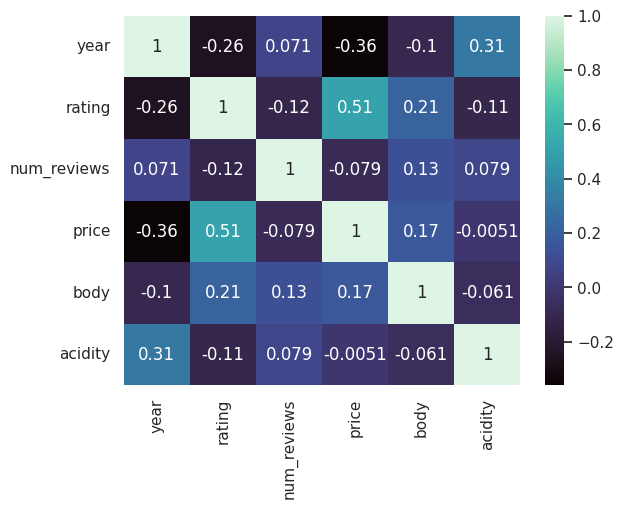

In [44]:
sns.heatmap(dfwine.corr(), annot=True, cmap='mako')

In [45]:
# Calculate the correlation matrix
corr_matrix = dfwine.corr(numeric_only=True)

# Get the correlation of 'price' with other features
corr_with_price = corr_matrix['price']

# Sort these correlations in descending order
sorted_correlations = corr_with_price.sort_values(ascending=False)

# Print out the sorted correlations
sorted_correlations

price          1.000000
rating         0.509223
body           0.165188
acidity       -0.005123
num_reviews   -0.079436
year          -0.361058
Name: price, dtype: float64

With this plot we can show the distribution of price,
we can see here the most saled wine price is between 100 and 500

Text(0.5, 1.0, 'Distribution of Price')

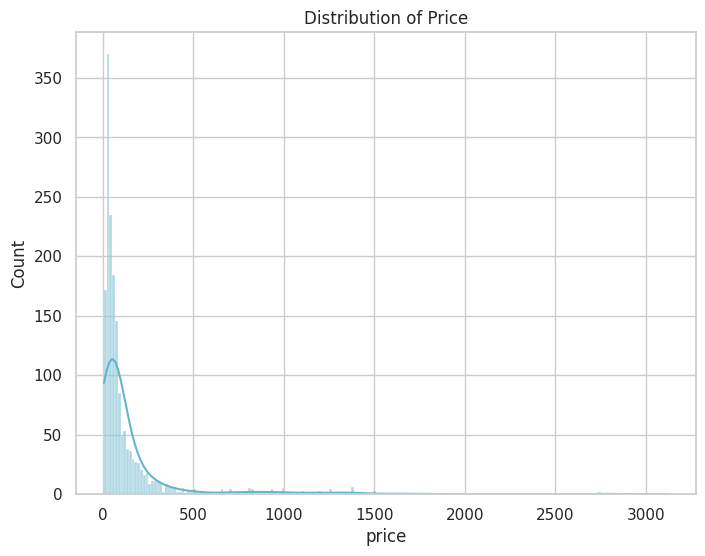

In [46]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.histplot(dfwine['price'], kde = True, color = 'c')
plt.title('Distribution of Price')

This boxplot visualizing the 'price' column grouped by the 'type' column from the DataFrame 'dfwine', we can see the outliers of all the features.

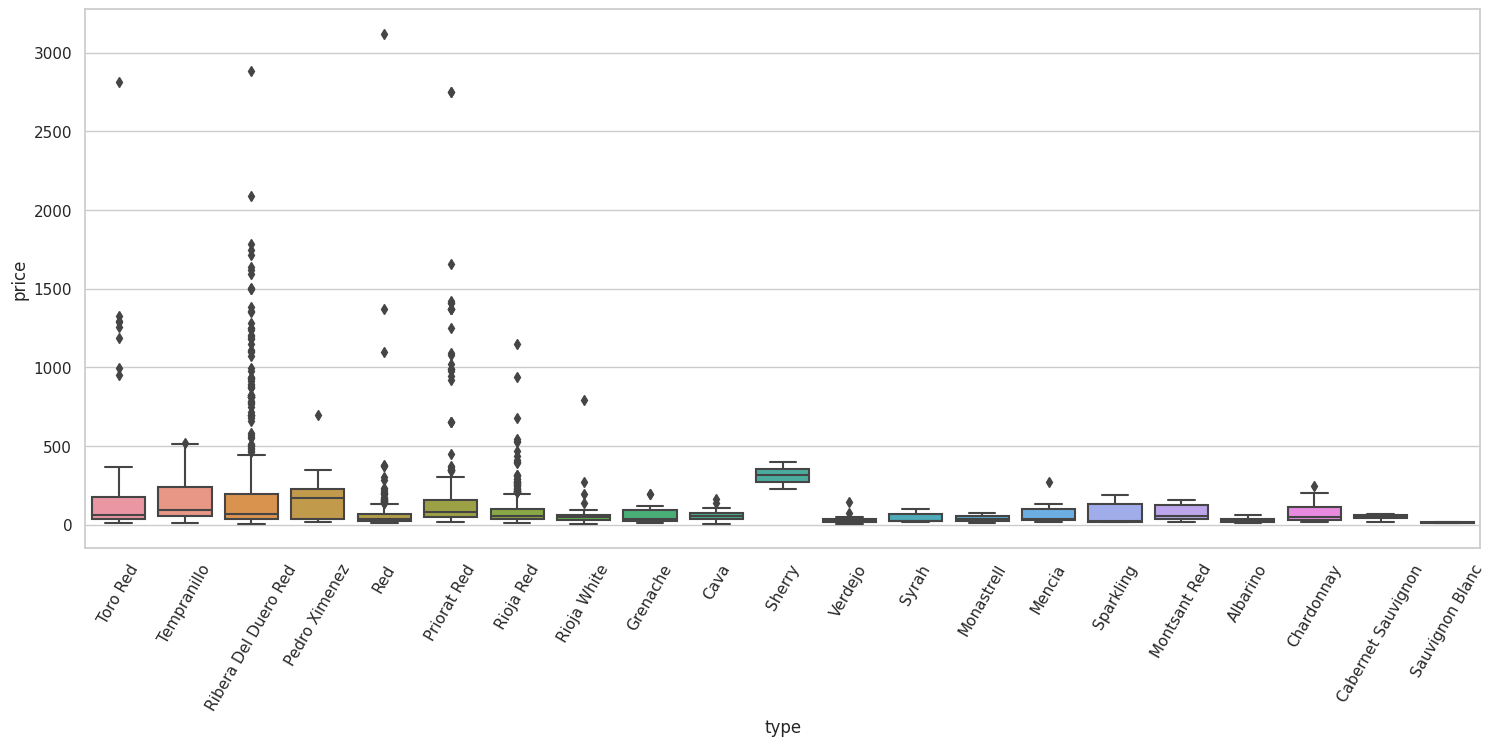

In [47]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='type', data=dfwine, ax=ax)
plt.xticks(rotation=60)
plt.show()

In [48]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1714 non-null   object 
 1   wine         1714 non-null   object 
 2   year         1714 non-null   int64  
 3   rating       1714 non-null   float64
 4   num_reviews  1714 non-null   int64  
 5   country      1714 non-null   object 
 6   region       1714 non-null   object 
 7   price        1714 non-null   float64
 8   type         1714 non-null   object 
 9   body         1714 non-null   float64
 10  acidity      1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 160.7+ KB


In [49]:
from scipy import stats

# Define a list of numeric columns
columns_to_check = ['year', 'rating', 'num_reviews', 'price']

# Calculate z-scores for the columns_to_check
z_scores = stats.zscore(dfwine[columns_to_check])

# Create a DataFrame of outliers based on z-scores
df_outliers = dfwine[(abs(z_scores) > 4).any(axis=1)]

In [50]:
print(df_outliers)

                 winery                             wine  year  rating  \
14          Toro Albala        Don PX Convento Seleccion  1946     4.8   
16         Vega Sicilia                            Unico  1962     4.8   
23          Toro Albala        Don PX Convento Seleccion  1931     4.8   
26          Toro Albala             Don PX Pedro Ximenez  1946     4.8   
27      Alvaro Palacios   L'Ermita Velles Vinyes Priorat  2004     4.8   
...                 ...                              ...   ...     ...   
1829      La Rioja Alta             Vina Ardanza Reserva  2008     4.2   
1830            El Coto  Coto de Imaz Rioja Gran Reserva  2012     4.2   
1831  Dominio de Pingus                              PSI  2016     4.2   
1832      La Rioja Alta             Vina Alberdi Reserva  2015     4.2   
1833    Abadia Retuerta               Seleccion Especial  2014     4.2   

      num_reviews country            region    price                  type  \
14            398  Espana  Montil

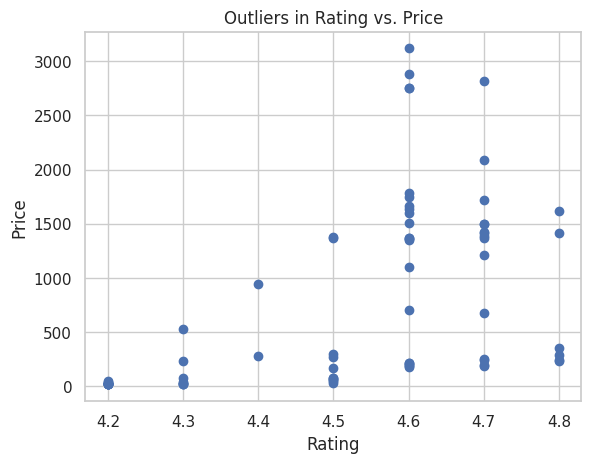

In [51]:
plt.scatter(df_outliers['rating'], df_outliers['price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Outliers in Rating vs. Price')
plt.show()

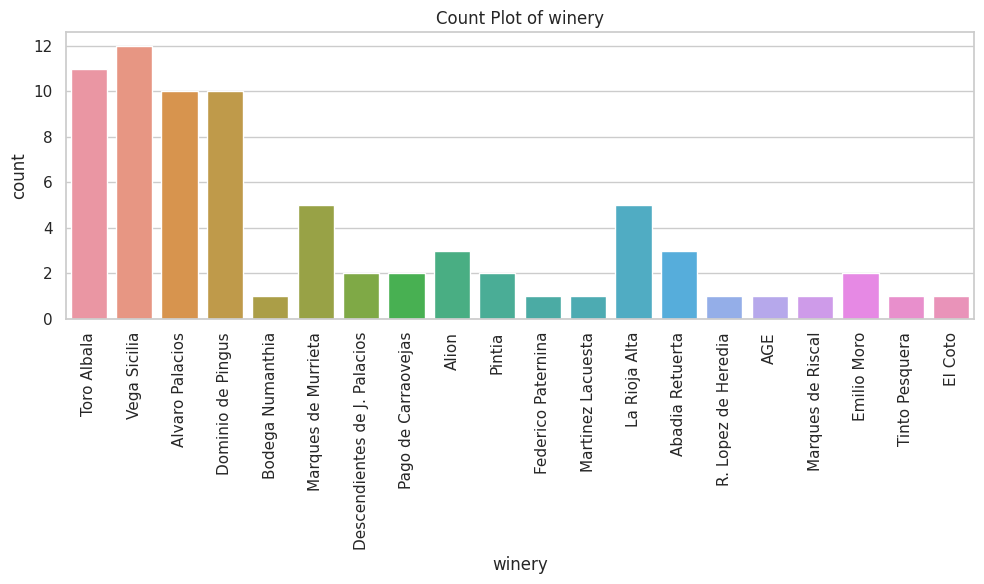

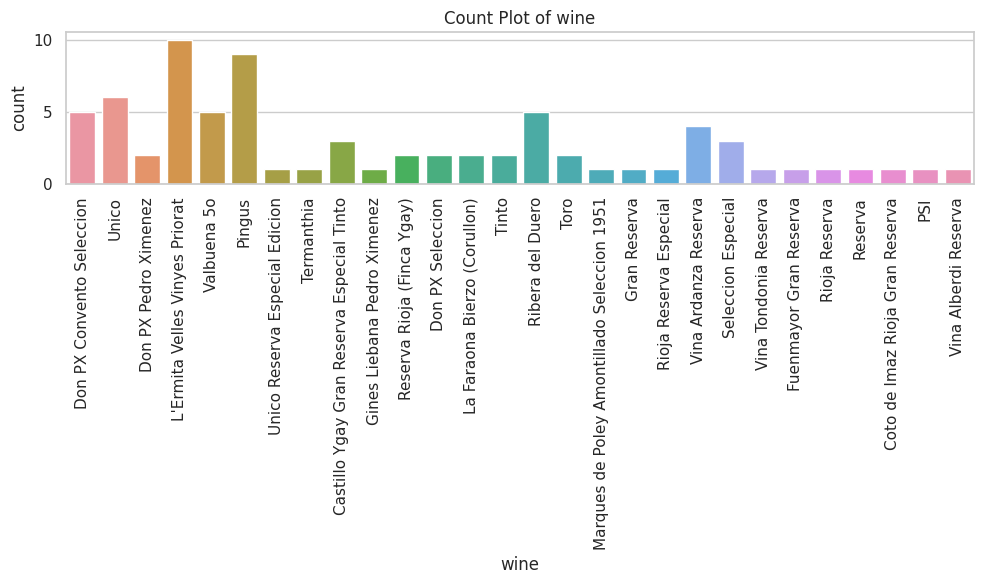

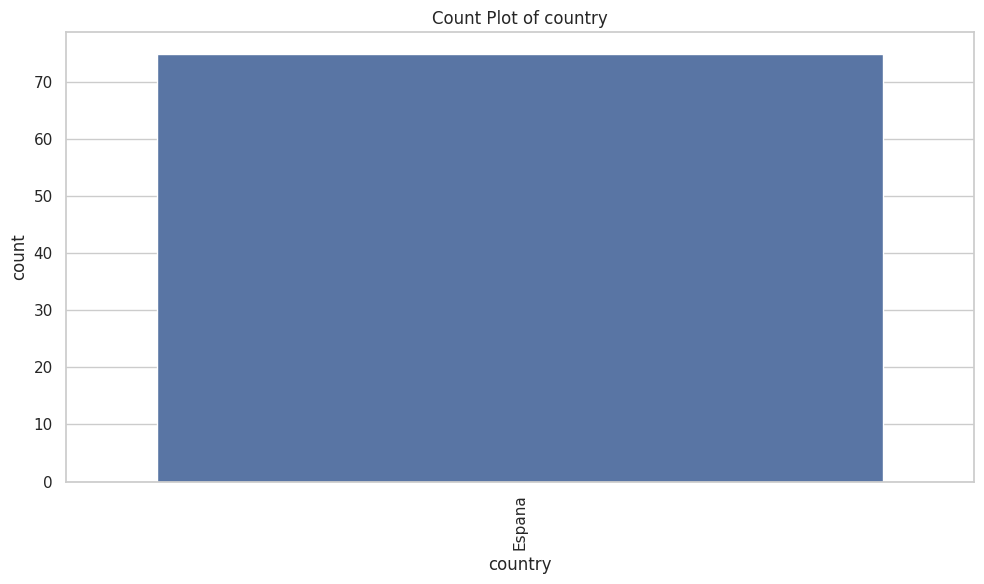

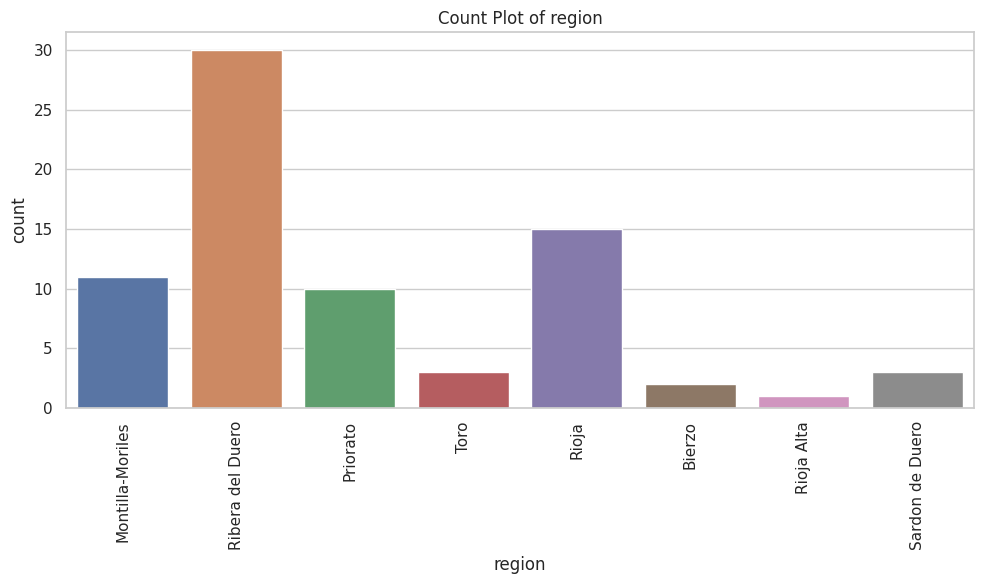

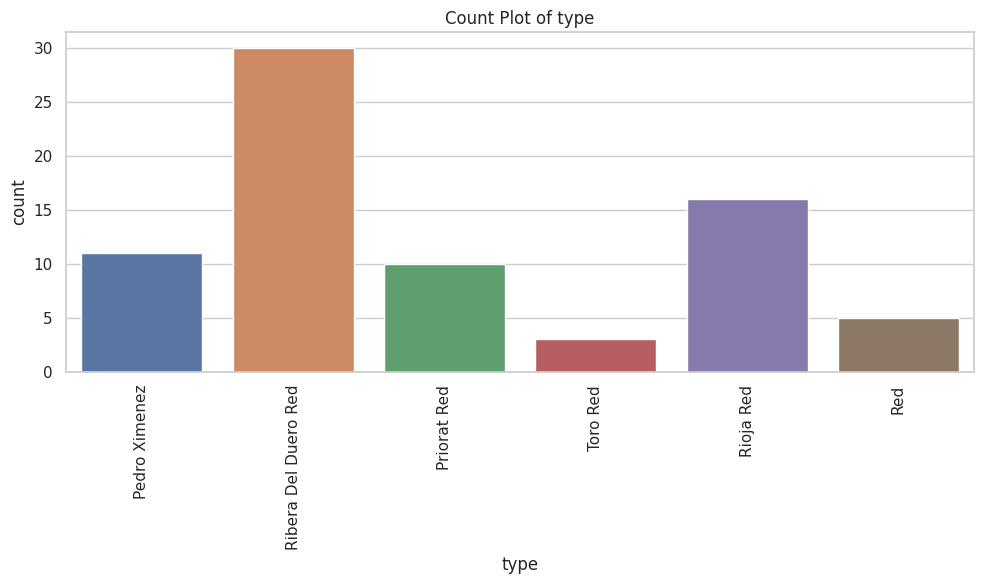

In [52]:
for column in df_outliers.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_outliers, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


***Visualization 1***

**Year vs Rating**

This scatter plot shows the relationship between the 'year' in which a wine was produced and its 'rating.' Each point represents a wine, and its position on the graph is determined by the year and rating of that wine.

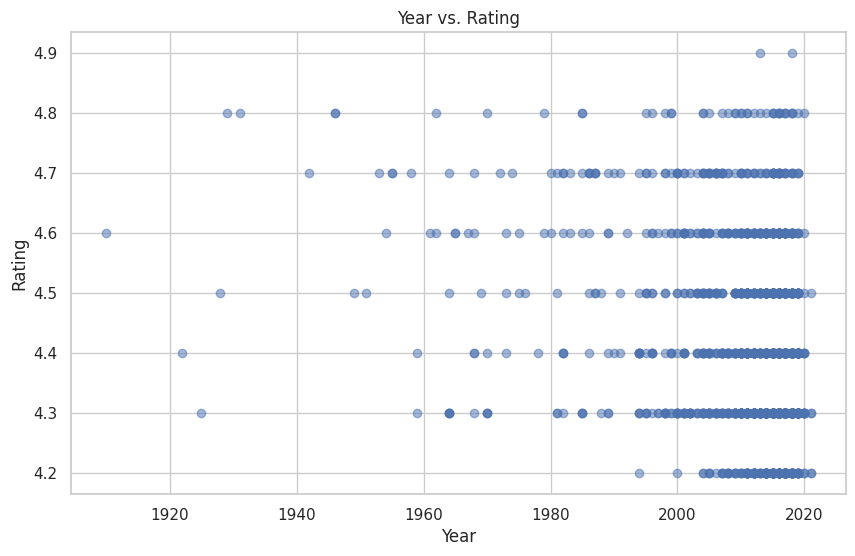

In [53]:
# Scatter plot of 'year' vs. 'rating'
plt.figure(figsize=(10, 6))
plt.scatter(dfwine['year'], dfwine['rating'], alpha=0.5)
plt.title('Year vs. Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


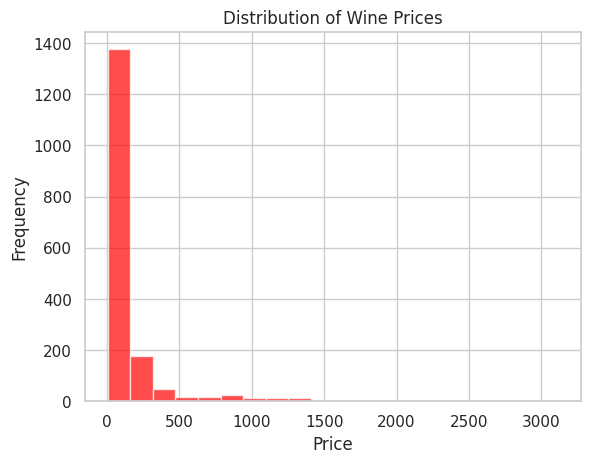

In [54]:

plt.hist(dfwine['price'], bins=20, color='red', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Prices')
plt.show()

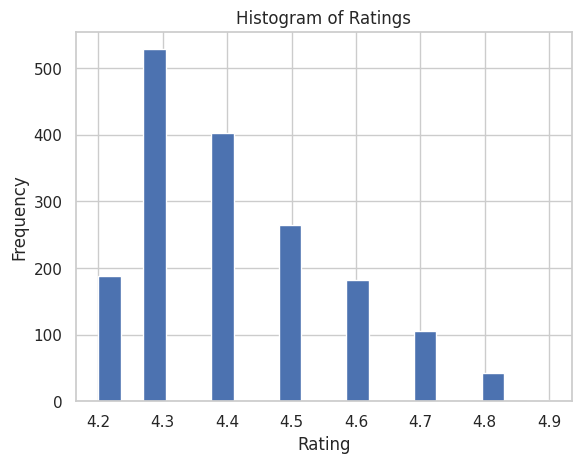

In [55]:
plt.hist(dfwine['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

***Part 2***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Encode categorical variables with one-hot encoding
df_encoded = pd.get_dummies(dfwine, columns=['winery', 'wine', 'country', 'region', 'type'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Step 1: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()

}

# Step 3: Hyperparameter Tuning
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5]}
}

best_models = {}

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

# Step 4: Training and Evaluation
results = {}

for model_name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[model_name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R^2': train_r2,
        'Test R^2': test_r2
    }

# Display the metrics for the best tuned version of each model
for model_name, metrics in results.items():
    print(f"Metrics for {model_name}:")
    print(metrics)
    print()



In [65]:
print(f"The best model is: {model_name}")

The best model is: Gradient Boosting


In [61]:
pca = PCA(n_components=10)


In [62]:
# Fit PCA on the standardized features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

***Mean Absolute Error (MAE):*** This metric represents the average absolute error between the predicted and actual wine prices. Lower MAE indicates better model accuracy in predicting prices.

***Mean Squared Error (MSE):*** MSE measures the average squared difference between predicted and actual prices. Like MAE, lower MSE values are preferable.

***R-squared (R^2):*** R-squared measures the proportion of the variance in wine prices that is explained by the model. Higher R^2 values suggest that the model better captures the variation in prices.

Based on the provided metrics for the different models, let's analyze which model to choose as the production model:



***Linear Regression:***



Test MAE: 61.60

Test MSE: 26,464.63

Test R^2: 0.714


***Decision Tree:***



Test MAE: 67.84

Test MSE: 44,928.05

Test R^2: 0.514


****Random Forest:****



Test MAE: 60.69
Test MSE: 29,835.58
Test R^2: 0.677


****Gradient Boosting:****



Test MAE: 58.07

Test MSE: 26,672.04

Test R^2: 0.712

Based on the provided metrics and the goal of predicting wine prices accurately, the ***Gradient Boosting model*** appears to be the most suitable production model. It achieves the lowest ***Test MAE*** and ***Test MSE*** while maintaining a relatively high ***Test R^2***, suggesting that it offers a good balance between predictive accuracy and model explainability. However, it's essential to validate the model's performance on a larger dataset or consider additional domain-specific factors before deploying it in a production environment.